## This notebook is a tool for loading in a sample collected from an SDR and looking at it through various lenses
### This supports analysis of signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [7]:
# first, upload/download your sample file
#!wget https://gitlab.com/jumson/sdr-samples/raw/master/doorbell/doorbell2_2M_200k_315.199M_400k
#!wget https://gitlab.com/jumson/sdr-samples/raw/master/doorbell/doorbell_2M_200k_315.199M_400k
#!wget https://gitlab.com/jumson/sdr-samples/raw/master/garage_door_opener/gdo2_2M_200k_315.218M_400k
!wget https://gitlab.com/jumson/sdr-samples/raw/master/garage_door_opener/HackRF_GarageDoor_315_8.iq

--2018-11-16 20:07:05--  https://gitlab.com/jumson/sdr-samples/raw/master/garage_door_opener/HackRF_GarageDoor_315_8.iq
Resolving gitlab.com (gitlab.com)... 35.231.145.151
Connecting to gitlab.com (gitlab.com)|35.231.145.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416267104 (397M) [application/octet-stream]
Saving to: ‘HackRF_GarageDoor_315_8.iq’

HackRF_GarageDoor_3 100%[===================>] 396.98M  40.7MB/s    in 10s     

2018-11-16 20:07:15 (39.7 MB/s) - ‘HackRF_GarageDoor_315_8.iq’ saved [416267104/416267104]



In [3]:
#outfile = './doorbell2_2M_200k_315.199M_400k'
#outfile = './doorbell_2M_200k_315.199M_400k'
outfile = './gdo2_2M_200k_315.218M_400k'
samp_rate = Fs = 2e6
center_freq = 315.218e6 # this is mainly for generating proper labels of axis
offset = 200e3


In [8]:

outfile2 = './HackRF_GarageDoor_315_8.iq'
samp_rate2 = Fs = 8e6
center_freq2 = 315e6 # this is mainly for generating proper labels of axis
mydat2 = dat2 = np.fromfile(outfile2, dtype="complex64")
print('data len ',str(mydat2.size))
print('duration estimation (seconds)',(mydat2.size/samp_rate2))

data len  52033388
duration estimation (seconds) 6.5041735


In [4]:
mydat=dat = np.fromfile(outfile, dtype="complex64")
print('data len ',str(mydat.size))
print('duration estimation (seconds)',(mydat.size/samp_rate))

data len  3669504
duration estimation (seconds) 1.834752


In [5]:
# This is how the samples can be viewed


def see_spec(dat,samp_rate,title='default_spectrogram'):
    # Spectrogram
    plt.figure(figsize=(20,4))
    plt.specgram(dat, NFFT=256, Fs=samp_rate)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.style.use('seaborn-poster')
    # uncomment below to save figure as .jpg, pdf, etc
    plt.savefig(title+".jpg", bbox_inches='tight', pad_inches=0.5)
    plt.show()
def see_psd(dat,samp_rate,title="default_psd"):
    plt.figure(figsize=(20,4))
    plt.title(title)
    plt.psd(dat, NFFT=1024, Fs=samp_rate, Fc=0, color="green")
    plt.savefig(title+".jpg", bbox_inches='tight', pad_inches=0.5)
    plt.show()
def see_plot(dat,title="default_plot"):

    # the x axis will be each value --
    x = range(dat.size)
    # the y axis is dat 
    plt.figure(figsize=(20,5))
    # the y axis is mydat 
    plt.xlabel("Time")
    plt.ylabel("amp or mag")
    #plt.scatter(x,mydat[lefty:righty])
    plt.plot(x,dat)
    plt.title(title)
    plt.savefig(title+".jpg", bbox_inches='tight', pad_inches=0.5)
    plt.show() 


def see_const(dat,title="default_constellation"):
    plt.figure(figsize=(8,8))
    plt.xlabel("In-Phase / Real")
    plt.ylabel("Quadrature / Imaginary")
    plt.scatter(np.real(dat[200000:300000]), np.imag(dat[200000:300000]))
    plt.title("Constellation of the 'signal'")
    plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
    plt.show() 
    
def get_shift(data,shift,samp_rate):
    # shift it the data from the center...
    # To mix the data down, generate a complex exponential 
    # with phase -f_shift/Fs
    fc = np.exp(-1.0j*2.0*np.pi* shift/samp_rate*np.arange(len(data)))
    # Try plotting this complex exponential with a scatter plot of the complex plan - 
    # what do you expect it to look like?
    y = data * fc
    return y

def filter_it():
    print("add this feature in future")
    

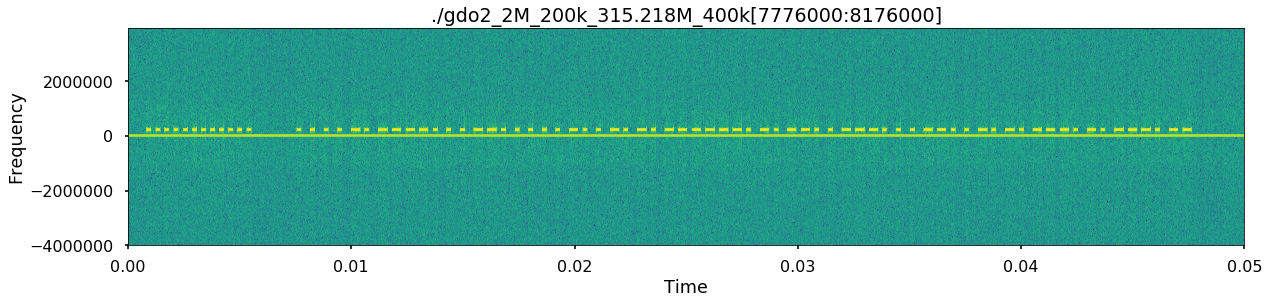

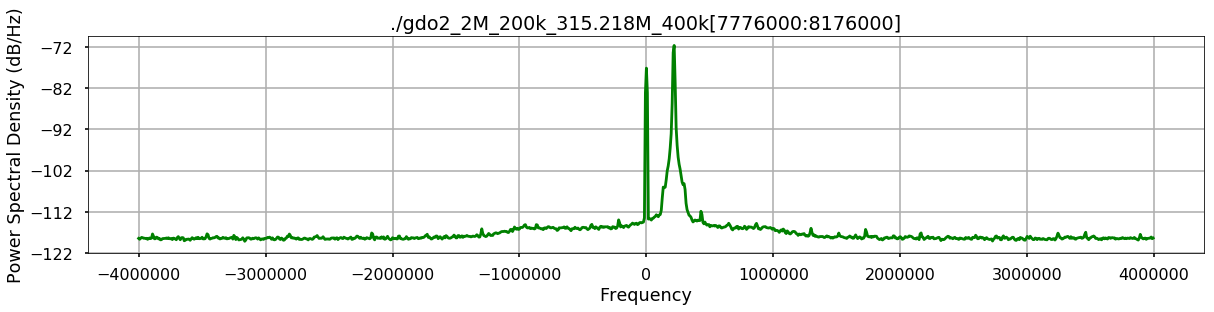

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


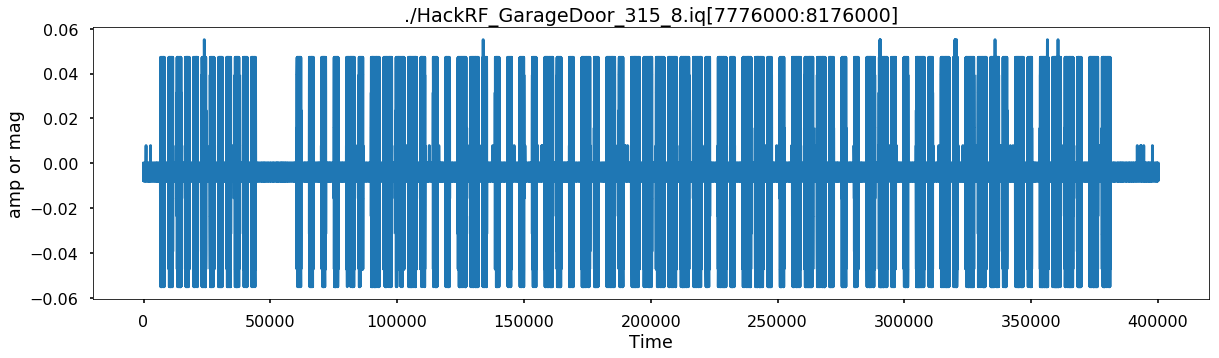

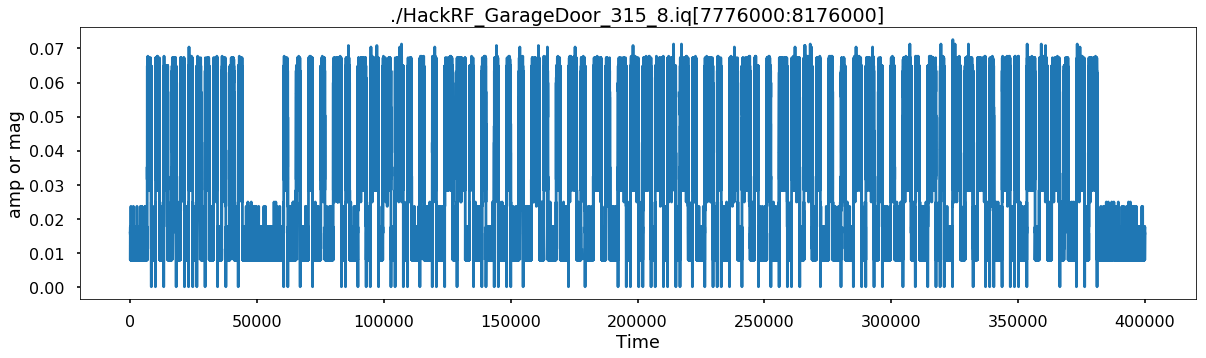

In [23]:
# so I can mnake my adjustmens using seconds
start = .972
duration = .05

lefts= int(samp_rate2*start)
rights = int(lefts + samp_rate2*duration)
see_spec(mydat2[lefts:rights],samp_rate2,outfile+'['+str(lefts)+':'+str(rights)+']')

#start = 2
#duration = 1
#lefts= int(samp_rate2*start)
#rights = int(lefts + samp_rate2*duration)
#see_spec(mydat2[lefts:rights],samp_rate2,outfile+'['+str(lefts)+':'+str(rights)+']')
see_psd(mydat2[lefts:rights],samp_rate2,outfile+'['+str(lefts)+':'+str(rights)+']')
see_plot(mydat2[lefts:rights],outfile2+'['+str(lefts)+':'+str(rights)+']')
see_plot(np.absolute(mydat2[lefts:rights]),outfile2+'['+str(lefts)+':'+str(rights)+']')
#see_spec(mydat,samp_rate)

In [26]:
import scipy.signal as signal
cent_dat = mydat2[lefts:rights]

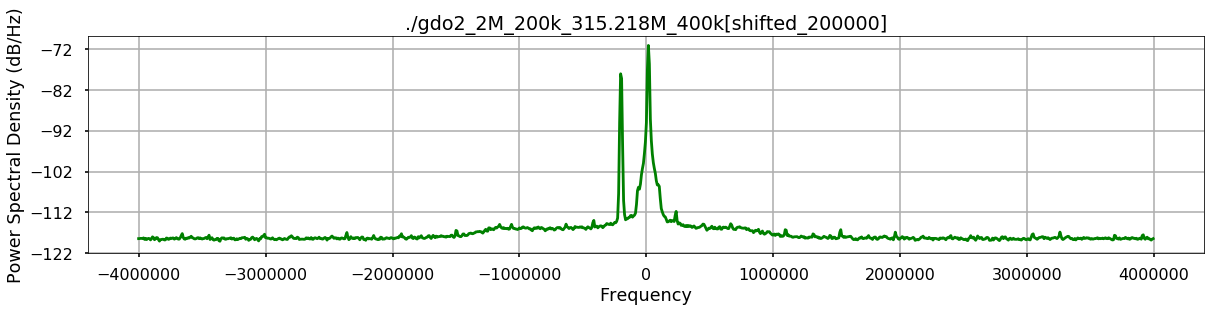

In [28]:
# shift the signal I want to center
shift = 200000
# To mix the data down, generate a complex exponential 
# with phase -f_shift/Fs
fc = np.exp(-1.0j*2.0*np.pi* shift/Fs*np.arange(len(cent_dat)))
# Try plotting this complex exponential with a scatter plot of the complex plan - 
# what do you expect it to look like?
shifted_data = cent_dat * fc
see_psd(shifted_data,samp_rate2,outfile+'[shifted_'+str(shift)+']')

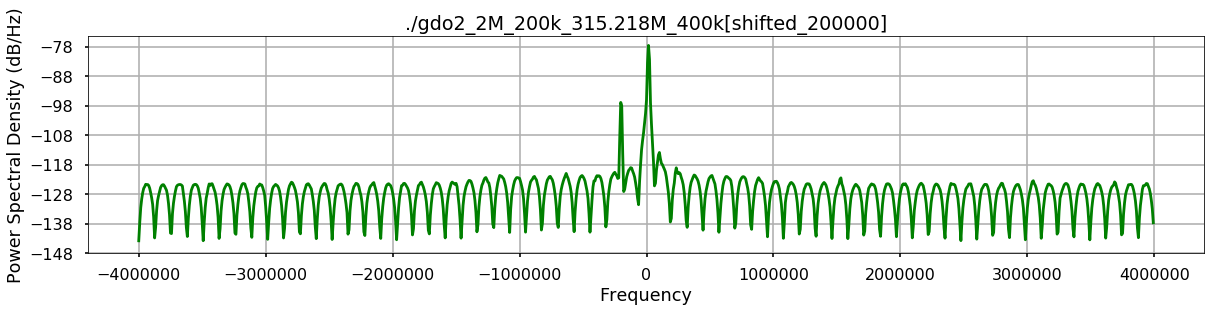

In [38]:
# now trying to do a low pass filter:
# This eans, the filter affects the outer edges, the center being zer0 -- 
# so lower freqs pass, higher (farther from center) are blocked
f_bw = 5000 # 200k filter for FM 10000 # fileter bandwidth
Fs  = samp_rate2 # sample_rate
n_taps = 64   # taps?
lpf = signal.remez(n_taps, [0, f_bw, f_bw+5000, Fs/2], [1,0], Hz=Fs)
filtered_data = signal.lfilter(lpf, 1.0, shifted_data)
see_psd(filtered_data,samp_rate2,outfile+'[filtered'+str(f_bw)+']')

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


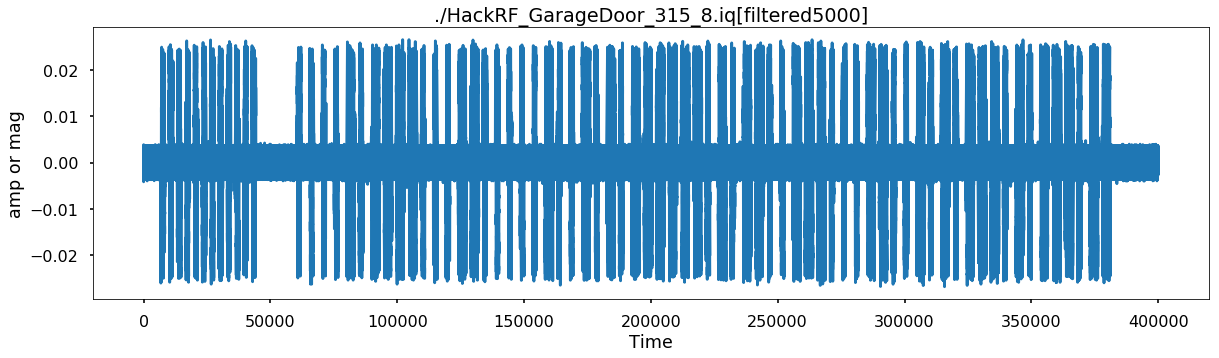

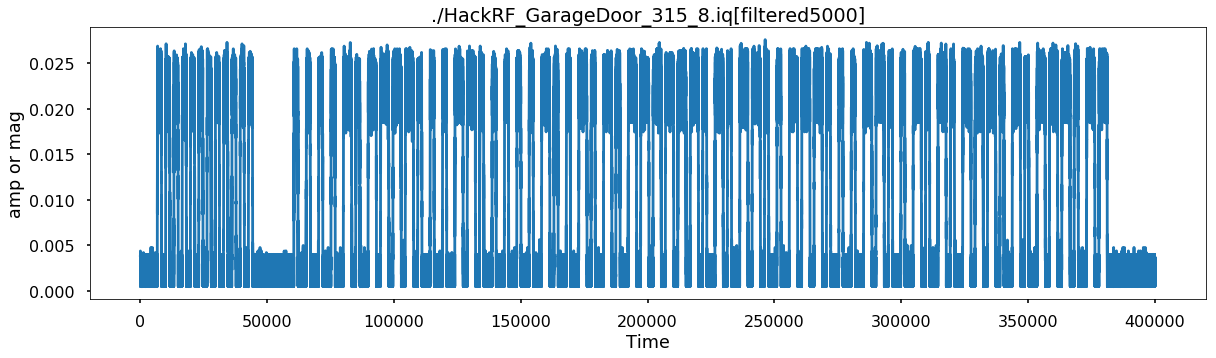

In [39]:
see_plot(filtered_data,outfile2+'[filtered'+str(f_bw)+']')
see_plot(np.absolute(filtered_data),outfile2+'[filtered'+str(f_bw)+']')

In [115]:
# save data as a file
y.tofile('./g_switch_cut_filtered_8m_433_centered.iq')
len(y)
# cent_dat.tofile(filename+'.cut.iq')

840000